# Selection and Reconstruction Studies



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyBumpHunter as BH
from datetime import datetime  ## Used to compute the execution time
import uproot as upr  ## Used to read data from a root file

In [2]:
#import xgboost as xgb
#import matplotlib.pyplot as plt
#import uproot as uproot
import pandas as pd
#import numpy as np
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import roc_curve, auc
import shutil
from array import array
import math
from tqdm import tqdm
import os

#print(xgb.__version__)

import ROOT
print(ROOT.gROOT.GetVersion())
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetLegendBorderSize(0)
ROOT.gStyle.SetLegendTextSize(0.035)
ROOT.gStyle.SetLegendFont(62)
ROOT.gStyle.SetLabelFont(62)

import analysisfunction

6.32.06


/Users/eyandel/Documents/MicroBooNE/bump/analysisfunction.py:2082: SyntaxWarning: invalid escape sequence '\S'
  '{} POT                      Stat. Uncert. Only\n$\Sigma$Data/$\Sigma$(MC+EXT)={}'.format(POT,


6.32.06


In [3]:
plot_folder = "test_selection_SURPRISE_run4b"
blind_data = True

if not os.path.exists('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder):
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder)
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/datamc')
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only')
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/plots_2d')
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/python_plots')
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/data')
    

In [4]:
#set base ROOT color numbers (from TAttFill class ref) for use with matplotlib
kWhite  = 0   
kBlack  = 1
kGray    = 920
kRed    = 632
kGreen  = 416
kBlue   = 600
kYellow = 400
kMagenta = 616
kCyan   = 432
kOrange = 800
kSpring = 820
kTeal   = 840
kAzure   =  860
kViolet = 880
kPink   = 900

#set default color and hatching
colors = [ROOT.gROOT.GetColor(kRed+2).AsHexString(), ROOT.gROOT.GetColor(kOrange+3).AsHexString(),
          ROOT.gROOT.GetColor(kGray).AsHexString(), ROOT.gROOT.GetColor(kOrange+1).AsHexString(),
          ROOT.gROOT.GetColor(38).AsHexString(), ROOT.gROOT.GetColor(30).AsHexString(),
          ROOT.gROOT.GetColor(kOrange+1).AsHexString(), ROOT.gROOT.GetColor(kAzure+6).AsHexString(),
          ROOT.gROOT.GetColor(kGreen+1).AsHexString(), ROOT.gROOT.GetColor(kPink+5).AsHexString(),
          ROOT.gROOT.GetColor(kPink-6).AsHexString(), ROOT.gROOT.GetColor(kPink-8).AsHexString(),
          ROOT.gROOT.GetColor(kPink-7).AsHexString(), ROOT.gROOT.GetColor(kPink).AsHexString()]

hatches = ['\\\\','\\\\','\\\\','\\\\',None,None,None,None,None,None,None,None,None,]

#default = do not plot y axis as log, and do not include eff and pur in title
plotlog = False
showeffpur = False

#default legend position (upper right corner)
legx1 = 0.45
legy1 = 0.55
legx2 = 0.85
legy2 = 0.85

#POT information
run1dataPOT = 0.0
run2dataPOT = 0.0
run3dataPOT = 0.0

run1dataPOT = 1.42549e+20
run2dataPOT = 2.54086e+20
run3dataPOT = 2.37673e+20
run4dataPOT = 1.07e+20 #8.958e+19

run4dataSpills = 25401921.0 #21262204.0

run1frac = 1.42549
run2frac = 2.54086
run3frac = 2.37673
run4frac = 1.07

run4ExtBnbSpills = 88445969.0

run1ExtBnbPOT = 2.02672e+20 #6.67349e+19
run2ExtBnbPOT = 3.60832e+20
run3ExtBnbPOT = 5.19263e+20
run4ExtBnbPOT = (run4dataPOT / run4dataSpills) * run4ExtBnbSpills
print(run4ExtBnbPOT)

#run1dataSpills =  6.9301e+06
#run3dataSpills = 0.0
#run1BnbPOT = 7.87981e+20   #4.14781e+20#1.16272e20
#run3BnbPOT = 6.28739e+20
#run1ExtBnbSpills = 1.488e+07
#run3ExtBnbSpills = 8.81379e+06
#run1DirtPOT = 3.56173e+20   #1.51589e+20
#run3DirtPOT = 3.59228e+20

Numu_Cut = 0.4 #0000000000000036 #0.10000000000000009  
Other_Cut = 0.2 #0000000000000018 #-0.3999999999999999  
NC_Pi0_Cut = -0.05 #999999999999982 #-0.3999999999999999  
Nue_Cut = -1.0 #-3.0

#Numu_Cut = 0.1 #-3.0 #0.40000000000000036 #0.10000000000000009  
#Other_Cut = -0.4 #0.20000000000000018 #-0.3999999999999999  
#NC_Pi0_Cut = -0.4 #-0.04999999999999982 #-0.3999999999999999  
#Nue_Cut = -3.0 #-1.0 #-3.0  

#files
nu_overlay_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnboverlay_run1_sp.root"       
nu_overlay_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnboverlay_run2_sp.root"      
nu_overlay_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnboverlay_run3_sp_1.root"     
DIRT_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_dirt_run1_sp.root"              
DIRT_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_dirt_run2_sp.root"              
DIRT_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_dirt_run3_sp.root"              
EXTBNB_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_extbnb_run1_sp.root"        
EXTBNB_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_extbnb_D2_run2_sp.root"         
EXTBNB_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_extbnb_run3_sp.root"         
BNB_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnb_run1_full.root"         
BNB_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnb_run2_full.root"               
BNB_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnb_run3_full.root"               
sp_overlay_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_inclusivephoton_run1_cv.root"
sp_overlay_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_inclusivephoton_run2_cv.root"
sp_overlay_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_inclusivephoton_run3_cv.root"
ncpi0_overlay_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_ncpi0_run1_sp.root"
ncpi0_overlay_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_ncpi0_run2_sp.root"
ncpi0_overlay_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_ncpi0_run3_sp.root"
lee_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_LEE_1g0p_run1_half.root"

nu_overlay_4b="/Users/eyandel/Documents/MicroBooNE/processed_checkout_rootfiles/run4b/MCC9.10_Run4b_v10_04_07_09_BNB_nu_overlay_surprise_reco2_hist.root"
DIRT_4b="/Users/eyandel/Documents/MicroBooNE/processed_checkout_rootfiles/run4b/MCC9.10_Run4b_v10_04_07_09_BNB_dirt_surpise_reco2_hist.root"
EXTBNB_4b="/Users/eyandel/Documents/MicroBooNE/processed_checkout_rootfiles/run4b/MCC9.10_Run4b_v10_04_07_09_Run4b_BNB_beam_off_surprise_reco2_hist.root"
BNB_4b="/Users/eyandel/Documents/MicroBooNE/processed_checkout_rootfiles/run4b/MCC9.10_Run4b_v10_04_07_10_BNB_beam_on_surprise_mix_makeups.root"
nue_overlay_4b="/Users/eyandel/Documents/MicroBooNE/processed_checkout_rootfiles/run4b/MCC9.10_Run4b_v10_04_07_09_BNB_nue_overlay_surprise_reco2_hist.root"
ncpi0_overlay_4b="/Users/eyandel/Documents/MicroBooNE/processed_checkout_rootfiles/run4b/MCC9.10_Run4b_v10_04_07_09_BNB_NC_pi0_overlay_surprise_reco2_hist.root"

#BNB_1 = ncpi0_overlay_1
#BNB_2 = ncpi0_overlay_2
#BNB_3 = ncpi0_overlay_3

3.72559173103483e+20


In [5]:
##FOR USING AN OVERLAY AS DATA
run1dataPOT = analysisfunction.GetPOT(ncpi0_overlay_1)
run2dataPOT = analysisfunction.GetPOT(ncpi0_overlay_2)
run3dataPOT = analysisfunction.GetPOT(ncpi0_overlay_3)

1.2771014098929228e+21
6.710204772333e+21
1.2311733857349017e+21


In [6]:
pot_vars = [
        ("run1BnbPOT", nu_overlay_1),
        ("run2BnbPOT", nu_overlay_2),
        ("run3BnbPOT", nu_overlay_3),
        ("run4BnbPOT", nu_overlay_4b),
        ("run1DirtPOT", DIRT_1),
        ("run2DirtPOT", DIRT_2),
        ("run3DirtPOT", DIRT_3),
        ("run4DirtPOT", DIRT_4b),
        ("run1SPPOT", sp_overlay_1),
        ("run2SPPOT", sp_overlay_2),
        ("run3SPPOT", sp_overlay_3),
        ("run1NCPi0POT", ncpi0_overlay_1),
        ("run2NCPi0POT", ncpi0_overlay_2),
        ("run3NCPi0POT", ncpi0_overlay_3),
        ("run4NCPi0POT", ncpi0_overlay_4b),
    ]

for var_name, file_name in pot_vars:
    globals()[var_name] = analysisfunction.GetPOT(file_name)

7.303211076491763e+20
9.049534941552791e+20
6.281006245845998e+20
7.876404293443845e+20
3.561395382175706e+20
7.533552993217751e+20
3.591920851932946e+20
3.0585834124312714e+20
8.151040776494641e+21
7.387567278135982e+21
9.98563866382949e+21
1.2771014098929228e+21
6.710204772333e+21
1.2311733857349017e+21
5.011709678602291e+21


# Load input files


In [7]:


#all_df_in_bdt_sp_overlay, all_df_in_pfeval_sp_overlay, all_df_in_kine_sp_overlay, all_df_in_eval_sp_overlay = analysisfunction.LoadTreesData(sp_overlay_1, sp_overlay_2, sp_overlay_3)


all_df_in_bdt_over, all_df_in_pfeval_over, all_df_in_kine_over, all_df_in_eval_over = analysisfunction.LoadTreesTruth(nu_overlay_1, nu_overlay_2, nu_overlay_3)

all_df_in_bdt_over = analysisfunction.LoadBNBOverlay(all_df_in_bdt_over, all_df_in_pfeval_over, all_df_in_kine_over, all_df_in_eval_over)
del all_df_in_pfeval_over
del all_df_in_eval_over
del all_df_in_kine_over

In [8]:
all_df_in_bdt_over, all_df_in_pfeval_over, all_df_in_kine_over, all_df_in_eval_over, all_df_in_time_over, all_df_in_pelee_over = analysisfunction.LoadTreesTruth1(nu_overlay_4b, su = True)

all_df_in_bdt_over = analysisfunction.LoadBNBOverlay(all_df_in_bdt_over, all_df_in_pfeval_over, all_df_in_kine_over, all_df_in_eval_over, all_df_in_time_over, all_df_in_pelee_over)
del all_df_in_pfeval_over
del all_df_in_eval_over
del all_df_in_kine_over
del all_df_in_time_over
del all_df_in_pelee_over

all_df_in_bdt_dirt, all_df_in_pfeval_dirt, all_df_in_kine_dirt, all_df_in_eval_dirt = analysisfunction.LoadTreesTruth(DIRT_1, DIRT_2, DIRT_3)

all_df_in_bdt_dirt = analysisfunction.LoadDirt(all_df_in_bdt_dirt, all_df_in_pfeval_dirt, all_df_in_kine_dirt, all_df_in_eval_dirt)
del all_df_in_pfeval_dirt
del all_df_in_eval_dirt
del all_df_in_kine_dirt

In [9]:
all_df_in_bdt_dirt, all_df_in_pfeval_dirt, all_df_in_kine_dirt, all_df_in_eval_dirt, all_df_in_time_dirt, all_df_in_pelee_dirt = analysisfunction.LoadTreesTruth1(DIRT_4b, su = True)

all_df_in_bdt_dirt = analysisfunction.LoadDirt(all_df_in_bdt_dirt, all_df_in_pfeval_dirt, all_df_in_kine_dirt, all_df_in_eval_dirt, all_df_in_time_dirt, all_df_in_pelee_dirt)
del all_df_in_pfeval_dirt
del all_df_in_eval_dirt
del all_df_in_kine_dirt
del all_df_in_time_dirt
del all_df_in_pelee_dirt

all_df_in_bdt_extbnb, all_df_in_pfeval_extbnb, all_df_in_kine_extbnb, all_df_in_eval_extbnb = analysisfunction.LoadTreesData(EXTBNB_1, EXTBNB_2, EXTBNB_3)

all_df_in_bdt_ext = analysisfunction.LoadExtBnb(all_df_in_bdt_extbnb, all_df_in_pfeval_extbnb, all_df_in_kine_extbnb, all_df_in_eval_extbnb)
del all_df_in_pfeval_extbnb
del all_df_in_eval_extbnb
del all_df_in_kine_extbnb

In [10]:
all_df_in_bdt_extbnb, all_df_in_pfeval_extbnb, all_df_in_kine_extbnb, all_df_in_eval_extbnb, all_df_in_time_extbnb, all_df_in_pelee_extbnb = analysisfunction.LoadTreesData1(EXTBNB_4b, su = True)

all_df_in_bdt_ext = analysisfunction.LoadExtBnb(all_df_in_bdt_extbnb, all_df_in_pfeval_extbnb, all_df_in_kine_extbnb, all_df_in_eval_extbnb, all_df_in_time_extbnb, all_df_in_pelee_extbnb)
del all_df_in_pfeval_extbnb
del all_df_in_eval_extbnb
del all_df_in_kine_extbnb
del all_df_in_time_extbnb
del all_df_in_pelee_extbnb

#all_df_in_bdt_bnb, all_df_in_pfeval_bnb, all_df_in_kine_bnb, all_df_in_eval_bnb = analysisfunction.LoadTreesData(BNB_1, BNB_2, BNB_3)
all_df_in_bdt_bnb, all_df_in_pfeval_bnb, all_df_in_kine_bnb, all_df_in_eval_bnb = analysisfunction.LoadTreesData(ncpi0_overlay_1, ncpi0_overlay_2, ncpi0_overlay_3)


all_df_in_bdt_data = analysisfunction.LoadBnb(all_df_in_bdt_bnb, all_df_in_pfeval_bnb, all_df_in_kine_bnb, all_df_in_eval_bnb)
del all_df_in_pfeval_bnb
del all_df_in_eval_bnb
del all_df_in_kine_bnb

In [11]:
all_df_in_bdt_bnb, all_df_in_pfeval_bnb, all_df_in_kine_bnb, all_df_in_eval_bnb, all_df_in_time_bnb, all_df_in_pelee_bnb = analysisfunction.LoadTreesData1(BNB_4b, su = True)
#all_df_in_bdt_bnb, all_df_in_pfeval_bnb, all_df_in_kine_bnb, all_df_in_eval_bnb = analysisfunction.LoadTreesData1(ncpi0_overlay_4b, su = True)


all_df_in_bdt_data = analysisfunction.LoadBnb(all_df_in_bdt_bnb, all_df_in_pfeval_bnb, all_df_in_kine_bnb, all_df_in_eval_bnb, all_df_in_time_bnb, all_df_in_pelee_bnb)
del all_df_in_pfeval_bnb
del all_df_in_eval_bnb
del all_df_in_kine_bnb
del all_df_in_time_bnb
del all_df_in_pelee_bnb

all_df_in_bdt_ncpi0, all_df_in_pfeval_ncpi0, all_df_in_kine_ncpi0, all_df_in_eval_ncpi0 = analysisfunction.LoadTreesTruth(ncpi0_overlay_1, ncpi0_overlay_2, ncpi0_overlay_3)

all_df_in_bdt_ncpi0 = analysisfunction.LoadNCPi0Overlay(all_df_in_bdt_ncpi0, all_df_in_pfeval_ncpi0, all_df_in_kine_ncpi0, all_df_in_eval_ncpi0)
del all_df_in_pfeval_ncpi0
del all_df_in_eval_ncpi0
del all_df_in_kine_ncpi0

In [12]:
all_df_in_bdt_ncpi0, all_df_in_pfeval_ncpi0, all_df_in_kine_ncpi0, all_df_in_eval_ncpi0, all_df_in_time_ncpi0, all_df_in_pelee_ncpi0 = analysisfunction.LoadTreesTruth1(ncpi0_overlay_4b, su = True)

all_df_in_bdt_ncpi0 = analysisfunction.LoadNCPi0Overlay(all_df_in_bdt_ncpi0, all_df_in_pfeval_ncpi0, all_df_in_kine_ncpi0, all_df_in_eval_ncpi0, all_df_in_time_ncpi0, all_df_in_pelee_ncpi0)
del all_df_in_pfeval_ncpi0
del all_df_in_eval_ncpi0
del all_df_in_kine_ncpi0
del all_df_in_time_ncpi0
del all_df_in_pelee_ncpi0

In [13]:
all_df = pd.concat([all_df_in_bdt_over, all_df_in_bdt_dirt, all_df_in_bdt_ext, all_df_in_bdt_data], ignore_index=True, sort=False)

In [14]:
del all_df_in_bdt_over
del all_df_in_bdt_dirt
del all_df_in_bdt_ext
del all_df_in_bdt_data

In [15]:
num_evts = all_df.shape[0]

y = all_df["true_event_type"].to_numpy()

w = []
#w = analysisfunction.CalculateWeights(all_df, run1dataPOT+run2dataPOT+run3dataPOT, run1ExtBnbPOT+run2ExtBnbPOT+run3ExtBnbPOT, pot_vars)
w = analysisfunction.CalculateWeights(all_df, run4dataPOT, run4ExtBnbPOT, pot_vars, run4 = True)

7.303211076491763e+20
9.049534941552791e+20
6.281006245845998e+20
7.876404293443845e+20
3.561395382175706e+20
7.533552993217751e+20
3.591920851932946e+20
3.0585834124312714e+20
8.151040776494641e+21
7.387567278135982e+21
9.98563866382949e+21
1.2771014098929228e+21
6.710204772333e+21
1.2311733857349017e+21
5.011709678602291e+21


In [16]:
weights_sig, weights_bkg, weights_data = analysisfunction.GetVariableArrays(all_df, "weights", "weights", [])
    
        
num_sig_tot=np.sum(weights_sig) #/ 0.83

## Plots

There is an unknown additional background type
3
There is an unknown additional background type
0
There is an unknown additional background type
111
There is an unknown additional background type
111
There is an unknown additional background type
111
There is an unknown additional background type
3
There is an unknown additional background type
111
There is an unknown additional background type
111
There is an unknown additional background type
0
There is an unknown additional background type
3
There is an unknown additional background type
3
There is an unknown additional background type
3
There is an unknown additional background type
0
There is an unknown additional background type
0
There is an unknown additional background type
3
There is an unknown additional background type
111
There is an unknown additional background type
0
There is an unknown additional background type
3
There is an unknown additional background type
111
There is an unknown additional background type
3
There 

(<cppyy.gbl.TH1F object at 0x363419d40>,
 <cppyy.gbl.TH1F object at 0x36341a130>)

python ERROR: cannot open image file "plots/root_plots/test_selection_SURPRISE_run4b/mc_only/Number of WC Showers.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file plots/root_plots/test_selection_SURPRISE_run4b/mc_only/Number of WC Showers.png


<Figure size 1600x800 with 0 Axes>

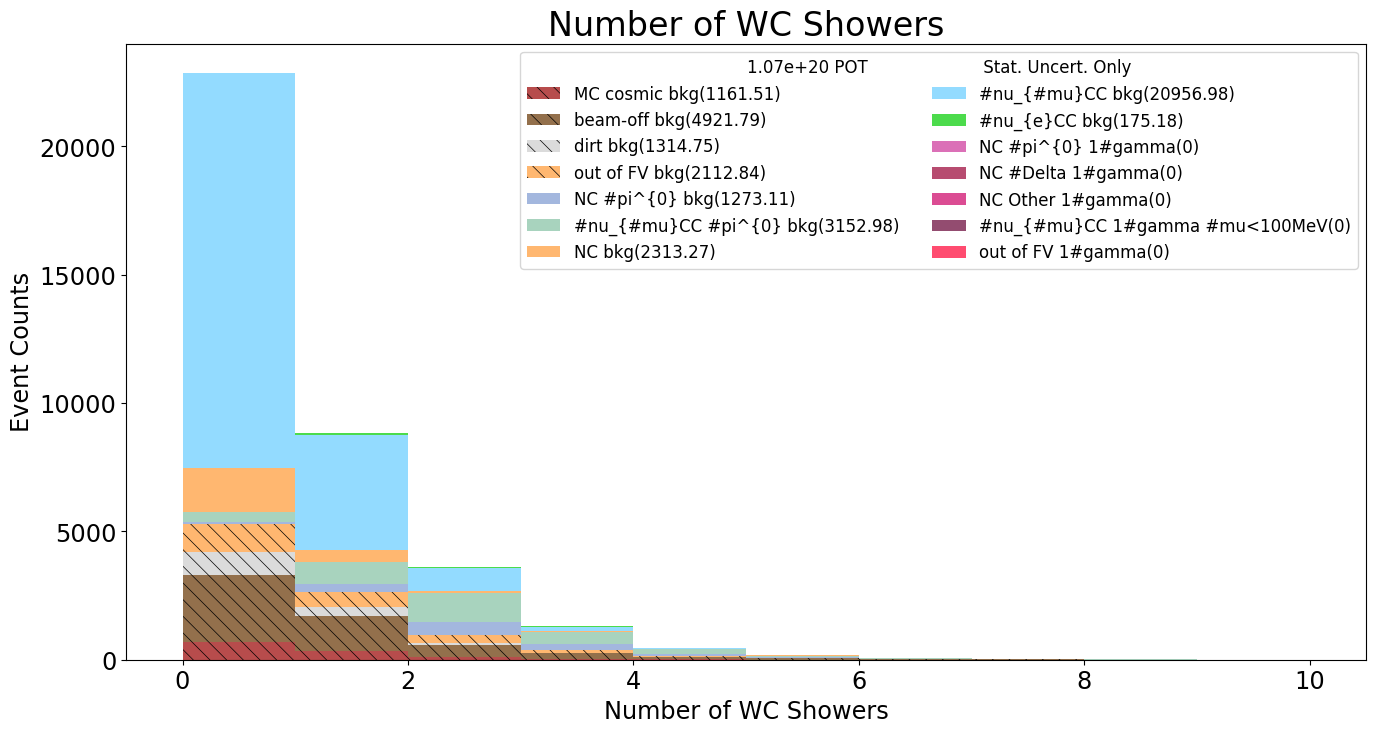

In [17]:
analysisfunction.MakeMCPlot(all_df, "shw_sp_n_20br1_showers", 1, 0, 10, "Number of WC Showers", "Number of WC Showers", "Event Counts", "generic", run4dataPOT, plot_folder, array_sig = [])